Housing Values in Suburbs of Boston


Target variable: medv: median value of owner-occupied homes in 1000s


Feature variable description:

crim: per capita crime rate by town

zn: proportion of residential land zoned for lots over 25,000 sq ft

indus: proportion of non-retail business acres per town

chas: charles river dummy variable (=1 if tract bounds river; 0- otherwise)

nox: nitrogen oxides concentration(parts per 10 mil)

rm: avg number of rooms/dwelling

age: proprtion of owner-occupied units built prior to 1940

dis: weighterd mean of distances to five Boston employment centres

rad: index of accessibility to radial highways

tax: full-value property tax rate per 10,000 dollars

ptratio: pupil-teacher ratio by town

black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

lstat: lower status of population (percent)


Problem: use Boston Housing dataset to discover relationships and find/compare the best algorithm for the dataset using train data then analyzing performance with test data.

Objective: find the best fit model that fits the target medv to the features crim, indus, nox, rm, age, dis, rad, tax, ptratio, black, and lstat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

OLS Regression on Boston Housing Dataset Training and Test 

Parameters of the model: [ 24.99467695 -10.11527003 -18.76294852   1.21048353  -0.75599248
  -5.02503417  -9.81625997   5.15681102   6.07534411 -13.96441831
  22.6688671   -8.14290947]
Train R-squared: 0.7429088696142414
Train Mean Squared Error: 22.33438159187355


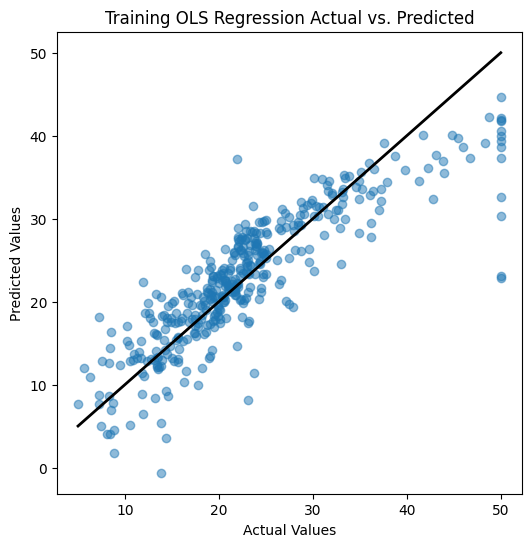

Test R-squared: 0.5396638448844293
Test Mean Squared Error: 33.75819178010205


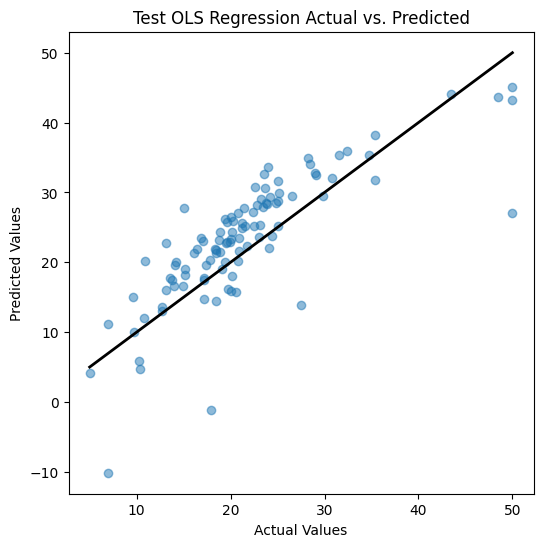

In [2]:
########## Train OLS ##########
from sklearn.model_selection import train_test_split


url = "https://raw.githubusercontent.com/DrUzair/MachineLearning/master/Datasets/Boston.csv"
data = pd.read_csv(url, index_col=0)


train_df, test_df = train_test_split(data, test_size=0.2, random_state=42) # Split the data into train test

# Assign independent variables
# ID left out as well not pertinent
# Dummy variable chas left out
# Zn variable left out; has 248 zeros (74.47%)
X_train = train_df[['crim', 'lstat', 'indus', 'age', 'tax', 'ptratio', 'black', 'rad', 'dis', 'rm', 'nox']]
X_norm = (X_train-X_train.min())/ (X_train.max() - X_train.min()) # Normalize
X_norm = np.concatenate((np.ones((X_norm.shape[0], 1)), X_norm), axis=1) # Because multiple variable linear regression column of ones added to the independent variables matrix so theta can be solved for in normal eq
y_train = train_df['medv'] # Assign dependent variable medv median value of owner occupied homes ($1000s)
theta = np.linalg.inv(X_norm.T.dot(X_norm)).dot(X_norm.T).dot(y_train) # Train model i.e. use normal eq to calculate the parameters

# After normal eq, theta has parameters of OLS model
print(f"Parameters of the model: {theta}")

y_pred_train = X_norm.dot(theta) # This theta can be used to make predictions 

mse_train = np.mean((y_train - y_pred_train)**2) # Calculate mean squared error (MSE)
# Calculate r squared 
ssr_train = np.sum((y_train - y_pred_train)**2)
sst_train = np.sum((y_train - np.mean(y_train))**2)
r2_train = 1 - (ssr_train/sst_train)


# Print MSE and R^2
print(f"Train R-squared: {r2_train}")
print(f"Train Mean Squared Error: {mse_train}")

# Plot actual v predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='black', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training OLS Regression Actual vs. Predicted')
plt.show()



########## Test OLS ##########
# Assign independent variables
# Dummy variable chas and id left out
# Zn variable left out; has 248 zeros (74.47%)
X_test = test_df[['crim', 'lstat', 'indus', 'age', 'tax', 'ptratio', 'black', 'rad', 'dis', 'rm', 'nox']]
y_test = test_df['medv'] # Assign target
X_norm = (X_test-X_test.min())/ (X_test.max() - X_test.min()) # Norm
X_norm = np.concatenate((np.ones((X_norm.shape[0], 1)), X_norm), axis=1) # Because multiple variable linear regression column of ones added to the independent variables matrix so theta can be solved for in normal eq

y_pred_test = X_norm.dot(theta) # Use train theta to predict test

mse_test = np.mean((y_test - y_pred_test)**2) # Calculate mean squared error (MSE)

# Calculate r squared 
ssr_test = np.sum((y_test - y_pred_test)**2)
sst_test = np.sum((y_test - np.mean(y_test))**2)
r2_test = 1 - (ssr_test/sst_test)

# Print MSE and R^2
print(f"Test R-squared: {r2_test}")
print(f"Test Mean Squared Error: {mse_test}")



# Plot actual v predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test OLS Regression Actual vs. Predicted')
plt.show()

Ridge Regression on Boston Housing Dataset Training and Test (normalized data: using formula (x - x_min/ x_max - x_min)

Lambda: 0.5, Train R-squared: 0.7409375946335799, Train Mean Squared Error: 22.505632959334367
Lambda: 1, Train R-squared: 0.7369359761392746, Train Mean Squared Error: 22.853267178775575
Lambda: 1.5, Train R-squared: 0.7321365952446928, Train Mean Squared Error: 23.27020573337877
Lambda: 2, Train R-squared: 0.726960620517372, Train Mean Squared Error: 23.719860276094494


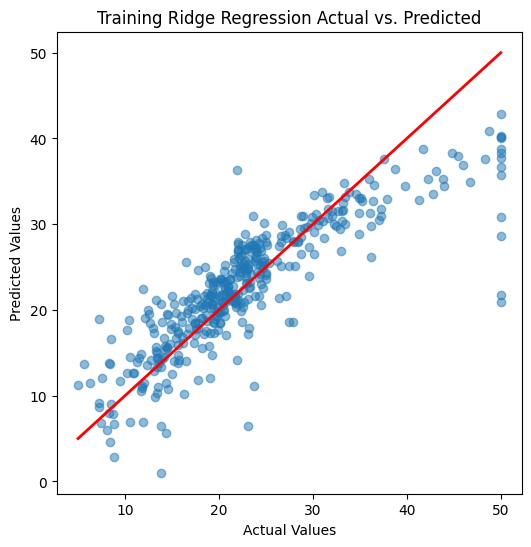

Lambda: 0.5, Test R-squared: 0.7409375946335799, Test Mean Squared Error: 22.505632959334367
Lambda: 1, Test R-squared: 0.7369359761392746, Test Mean Squared Error: 22.853267178775575
Lambda: 1.5, Test R-squared: 0.7321365952446928, Test Mean Squared Error: 23.27020573337877
Lambda: 2, Test R-squared: 0.726960620517372, Test Mean Squared Error: 23.719860276094494


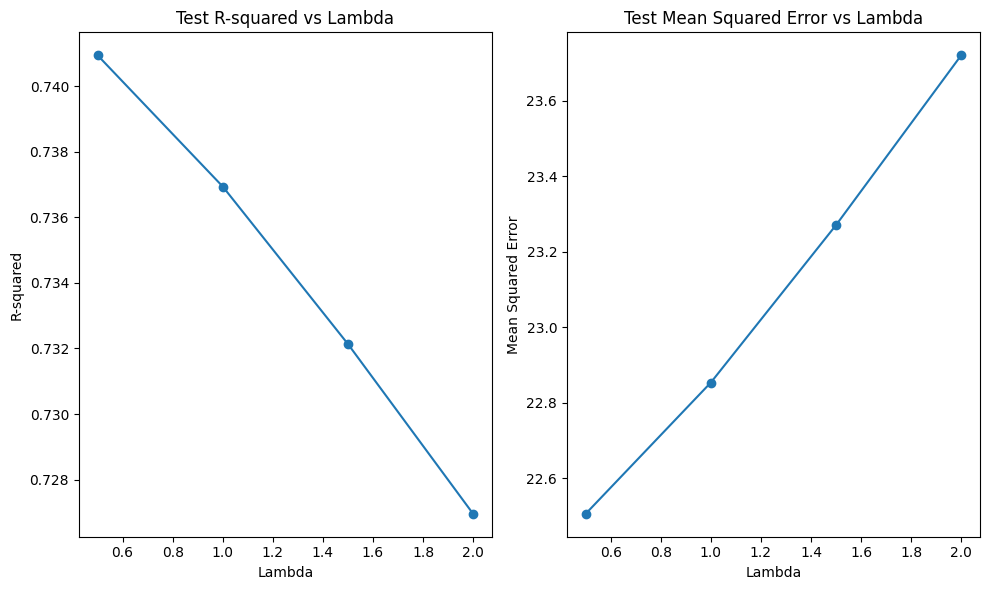

In [3]:
########## Train ##########
lambdas = [0.5, 1, 1.5, 2] # Set the values of lambda as given in assignment
y_train = train_df['medv'] # Assign dependent variable medv median value of owner occupied homes ($1000s)

# Assign independent variables
# ID left out not pertinent
# Dummy variable chas left out
# Zn variable left out; has 248 zeros (74.47%)
X_train = train_df[['crim', 'lstat', 'indus', 'age', 'tax', 'ptratio', 'black', 'rad', 'dis', 'rm', 'nox']]
X_norm = (X_train-X_train.min())/ (X_train.max() - X_train.min()) # Normalize features

X_norm = np.concatenate((np.ones((X_norm.shape[0], 1)), X_norm), axis=1) # Because multiple variables column of ones added 

# Store the theta for the lambdas
thetas = {}

for lambda_val in lambdas:
    I = np.identity(X_norm.shape[1]) 
    theta = np.linalg.inv(X_norm.T.dot(X_norm) + lambda_val * I).dot(X_norm.T).dot(y_train) # theta = inv(X'X + lambda*I)X'y
    thetas[lambda_val] = theta
    
    y_pred_train = X_norm.dot(theta)  # Make predictions using theta

    # Calculate r squared 
    ssr_train = np.sum((y_train - y_pred_train)**2)
    sst_train = np.sum((y_train - np.mean(y_train))**2)
    r2_train = 1 - (ssr_train/sst_train)
    mse_train = np.mean((y_train - y_pred_train)**2) # Calculate MSE
 
    # Print the lambda value, MSE, and R^2
    print(f"Lambda: {lambda_val}, Train R-squared: {r2_train}, Train Mean Squared Error: {mse_train}")

# Plot actual v predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Training Ridge Regression Actual vs. Predicted')
plt.show()
########## Test ##########
lambdas = [0.5, 1, 1.5, 2] # Set the values of lambda as given in assignment
y_test = train_df['medv'] # Assign dependent variable medv median value of owner occupied homes ($1000s)
X_test = train_df[['crim', 'lstat', 'indus', 'age', 'tax', 'ptratio', 'black', 'rad', 'dis', 'rm', 'nox']] # Assign independent variables
X_norm_test = (X_train-X_train.min())/ (X_train.max() - X_train.min()) # Normalize features
X_norm_test = np.concatenate((np.ones((X_norm_test.shape[0], 1)), X_norm_test), axis=1) # Because multiple variables column of ones added 

r2_list_test = []
mse_list_test = [] # Initialize list for plot
for lambda_val in lambdas:
    
    theta = thetas[lambda_val] # Using theta for current lambda
    
    y_pred_test = X_norm_test.dot(theta) # Make predictions using theta 

    # Calculate r squared 
    ssr_test = np.sum((y_test - y_pred_test)**2)
    sst_test = np.sum((y_test - np.mean(y_test))**2)
    r2_test = 1 - (ssr_test/sst_test)
    
    r2_list_test.append(r2_test)  # Append for plot
    mse_test = np.mean((y_test - y_pred_test)**2) # Calculate MSE 
    mse_list_test.append(mse_test)  # Append for plot
    
    # Print the lambda value, MSE, and R^2
    print(f"Lambda: {lambda_val}, Test R-squared: {r2_test}, Test Mean Squared Error: {mse_test}")

# Plot results
plt.figure(figsize=(10, 6))

# Plot R-squared v lambda
plt.subplot(1, 2, 1)
plt.plot(lambdas, r2_list_test, marker='o')
plt.title('Test R-squared vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('R-squared')

# Plot Mean sq error v lambda
plt.subplot(1, 2, 2)
plt.plot(lambdas, mse_list_test, marker='o')
plt.title('Test Mean Squared Error vs Lambda')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()

Gradient Descent Boston Housing Dataset Training and Test 

Epoch 0: Mean Squared Error = 0.06170583469416245


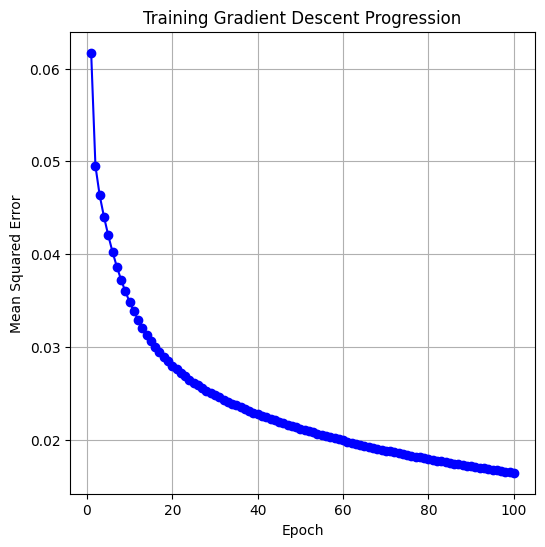

Epoch 99: Mean Squared Error = 0.016448213345908427, Train R-Squared = 0.38411922592653647, w = [-0.0269333  -0.22290444 -0.03928579  0.02653914 -0.0362615  -0.11704892
  0.19512338 -0.00486414  0.02588186  0.33343586 -0.02753276], b = 0.20780835762440286
Test Mean Squared Error = 0.017761453212499057, Test R-Squared = 0.5095446981552916


In [13]:
########## Train ##########
norm = (train_df - train_df.min()) / (train_df.max() - train_df.min()) # Normalize data
X_train = norm[['crim', 'lstat', 'indus', 'age', 'tax', 'ptratio', 'black', 'rad', 'dis', 'rm', 'nox']] # Assign features
y_train = norm['medv'] # Assign target

w = np.random.randn(X_train.shape[1]) * 0.01
b = 0.0
learning_rate = 0.1
epochs = 100 # Initialize parameters

# Define gradient descent function
def gradient_descent(X, y, w, b, learning_rate):
    N = X.shape[0]
    y_pred = np.dot(X, w) + b
    gradw = -2 * np.dot(X.T, (y - y_pred)) / N
    gradb = -2 * np.sum(y - y_pred) / N
    w = w - learning_rate * gradw
    b = b - learning_rate * gradb
    return w, b

# Store mean squared error across epochs
mse_plot_train = []
best_w = w
best_b = b
best_mse = float('inf')

# Gradient descent iterations
for epoch in range(epochs):
    w, b = gradient_descent(X_train, y_train, w, b, learning_rate)
    y_hat = np.dot(X_train, w) + b
    mse_loss = np.mean((y_train - y_hat)**2)
    mse_plot_train.append(mse_loss)
    
    if mse_loss < best_mse:
        best_mse = mse_loss
        best_w = w
        best_b = b
    
    if epoch % 100 == 0:  # Print every 100 epochs
        print(f"Epoch {epoch}: Mean Squared Error = {mse_loss}")

# Plot Mean Squared Error across epochs
plt.figure(figsize=(6, 6))
plt.plot(range(1, epochs + 1), mse_plot_train, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training Gradient Descent Progression')
plt.grid(True)
plt.show()
print(f"Epoch {epoch}: Mean Squared Error = {mse_loss}, Train R-Squared = {r2_train}, w = {w}, b = {b}")
########## Test ##########
norm_test = (test_df - test_df.min()) / (test_df.max() - test_df.min()) # Normalize test data
X_test = norm_test[['crim', 'lstat', 'indus', 'age', 'tax', 'ptratio', 'black', 'rad', 'dis', 'rm', 'nox']] # Assign features
y_test = norm_test['medv'] # Assign target

# Calculate predictions on test set
y_hat_test = np.dot(X_test, best_w) + best_b
mse_test = np.mean((y_test - y_hat_test)**2)
ssr_test = np.sum((y_test - y_hat_test)**2)
sst_test = np.sum((y_test - np.mean(y_test))**2)
r2_test = 1 - (ssr_test / sst_test)

print(f"Test Mean Squared Error = {mse_test}, Test R-Squared = {r2_test}")


Comparison and Analysis


Explanation of each algorithm:

OLS Regression: This modeling method is good for linear data and the goal is to predict values that best show the relationship between the target(independent) and feature(dependent) variables. It does this by minimizing the sum of squared risiduals to show error by adjusting theta(coefficients) calculated from the normal equation and find the best fit predictions to the data. 

Ridge Regresssion: Ridge regression is helpful when multicolinearity is problematic. The key here is the bias-variance trade off, a little bias or regularization term known as lambda is introduced to lower the variance. The advantage over linear ols regression is it has lower mean squared errors and can produce predictions more reliably when multicolinearity is problematic.You can use the regularization parameter to handle over complexity.

Gradient Descent: Optimization algoorithm used to minimize the function, it works by initializing parameters weight and bias set to 0 or random small values and makes a prediction. Then, it uses mean squared error to judge the performance of the model. It updates the parameters while moving in the opposite direction of the cost function or gradient. Fianlly throughout iteration or epochs it converges to a local minimum.

Comparison of the performance between OLS, Ridge Regression, and Gradient Descent using Mean Squared Error and R-Squared score:
OLS Regression: Train: R-Squared: 0.7439, MSE: 22.3343; Test: R-Squared: 0.53, MSE: 32
Ridge Regression:(Lambda 0.5) Train: R-Squared: 0.7412, MSE: 22.5; Test: R-Squared: 0.74,MSE: 22
Gradient Descent: Train: R-Squared: 0.38, MSE: 0.0164; Test: R-Squared: 0.509, MSE: 0.017
OLS Regression has the highest testing R-Squared value suggesting it explains the variance in the model well; however, it also has the highest mean squared error suggesting that the model does not predict as well as the other algorithms. This could be due to multicolinearity and the model being influenced by nosie or overcomplexity. Ridge Regression has a slightly lower R-Squared score than OLS regression but a much lower mean squared error. This is because of the bias-variance tradeoff, regularization parameter, introduced in ridge regression equation handles some of the complexity influencing ridge regression. Even though the R-Squared score is not as high as that in OLS regression, the lower MSE may suggest Ridge Regression was a better fit for this dataset and may generalize better. Gradient Descent aims to minimize the cost function with the optimal parameters it finds iteratively. 

Analyzation of the effect of normalization and regularization parameter for Ridge Regression: I used the formula (x - x_min/ x_max - x_min) to normalize the dataset. The purpose of this is so the model does not overfit to values that happen to be higher. The min max normalization put the data in a range of values between 0 and 1 which helps standardize the data to build a more accurate model. In ridge regression this normalization is essential to the overall performance of the model. The regularization parameters in ridge regression (lambda: 0, 0.5, 1, 1.5, 2) effected the MSE and R-Squared values; as lambda increased, the R-Squared score began decreasing whereas the mean squared error began increasing. However, it is worth noting the change was not astronomically large, in fact it was quite a marginal change from the initial.
